In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Following are the list of algorithm that are used in this notebook
Algorithm
Logistic Regression
Decision Tree
Random Forest
XGBoost
KNeighbours
SVM
In this following cell we have read the dataset using pandas.
It is considered as a good practice to make a copy of main data and work on the copy of dataset.


In [3]:
main_df = pd.read_csv('C:/Users/owlci/Desktop/heart.csv')
df = main_df.copy()

# Getting top 5 rows
df.head()

In [4]:
# Getting top 5 rows
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Dimension of dataframe
df.shape

(303, 14)

We have 303 rows and 14 columns in our dataset

In [6]:
# List of all columns present in dataframe
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
# To view some basic statistical details 
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In our dataset Mean age is 54, Minimum age is 29, maximum age is 77, 25% of the people in our dataset have age less than 47 and 75% of the people in our dataset have age less than 61.

In [9]:
# getting the information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


By above table we can see that non of our value is object type, all of them are numerical type with no missing value.

In [11]:
#  check for null value 
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [12]:
# checking number of unique values in each column
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

# Visualization

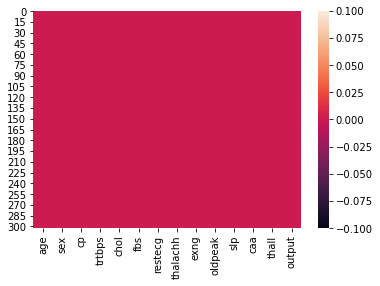

In [13]:
# Checking null value using heatmap
sns.heatmap(df.isnull())

No dot/marks are present in the graph (red region) it means we donot have any missing value.

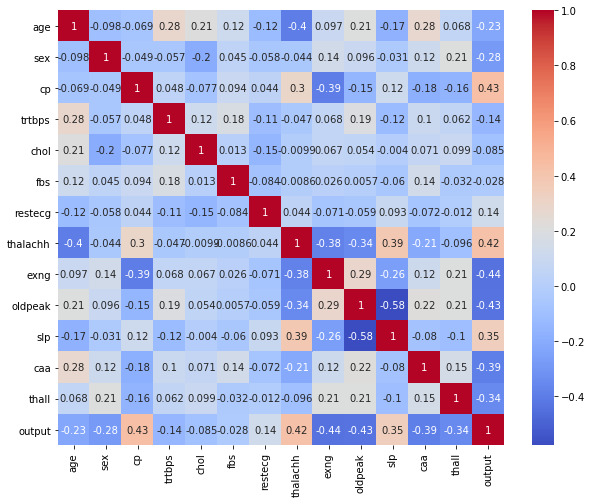

In [15]:
# correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

Two features can be positively correlated or negatively. But if they are highly correlated then we should drop one of them.

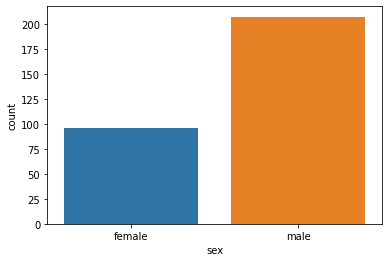

In [17]:
ax = sns.countplot(x = "sex",data= df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["female", "male"])
plt.show()

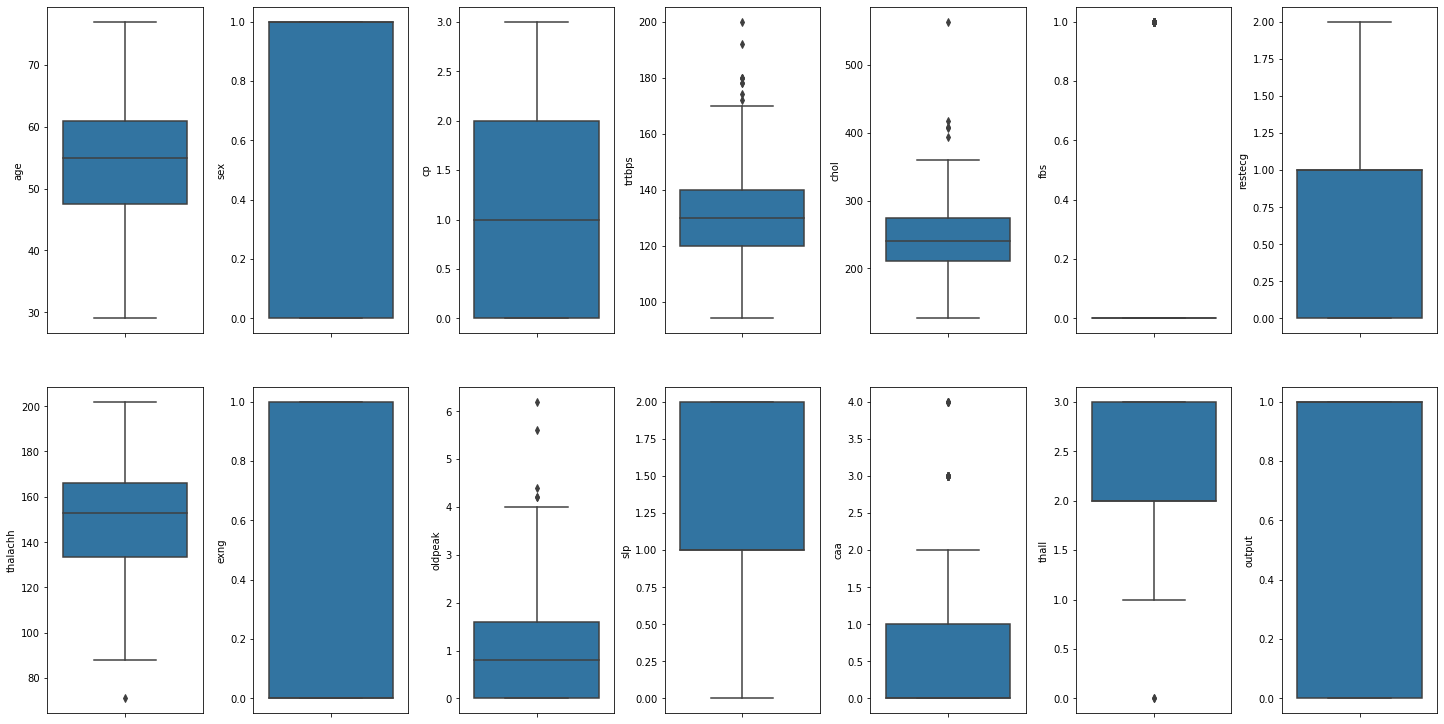

In [18]:
# Visualizing dataset and also checking for outliers 

fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

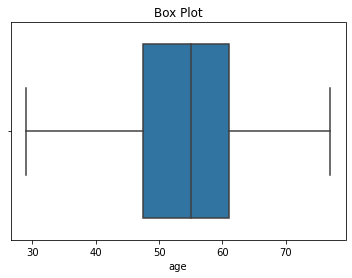

In [19]:
# Individual box plot for each feature
def Box(df):
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box(df['age'])

In [22]:
# Min-Max normalization
# Here we are taking only 4 column for normalization because in this the value are too high as compare to others

cols = ['trtbps', 'chol', 'thalachh', 'oldpeak', 'age']
for col in cols:
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum)/ (maximum - minimum)

In [23]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


In [24]:
print(df[["sex", "output"]].groupby(['sex']).mean())

       output
sex          
0    0.750000
1    0.449275


In [25]:
print(df[["cp", "output"]].groupby(['cp']).mean())

      output
cp          
0   0.272727
1   0.820000
2   0.793103
3   0.695652


In [26]:
print(df[["fbs", "output"]].groupby(['fbs']).mean())

       output
fbs          
0    0.550388
1    0.511111


In [27]:
print (df[["exng", "output"]].groupby(['exng']).mean())

        output
exng          
0     0.696078
1     0.232323


In [28]:
print (df[["exng", "output"]].groupby(['exng']).mean())

        output
exng          
0     0.696078
1     0.232323


Here we are grouping the data based on different categories and therefore we can also check other features for more information.

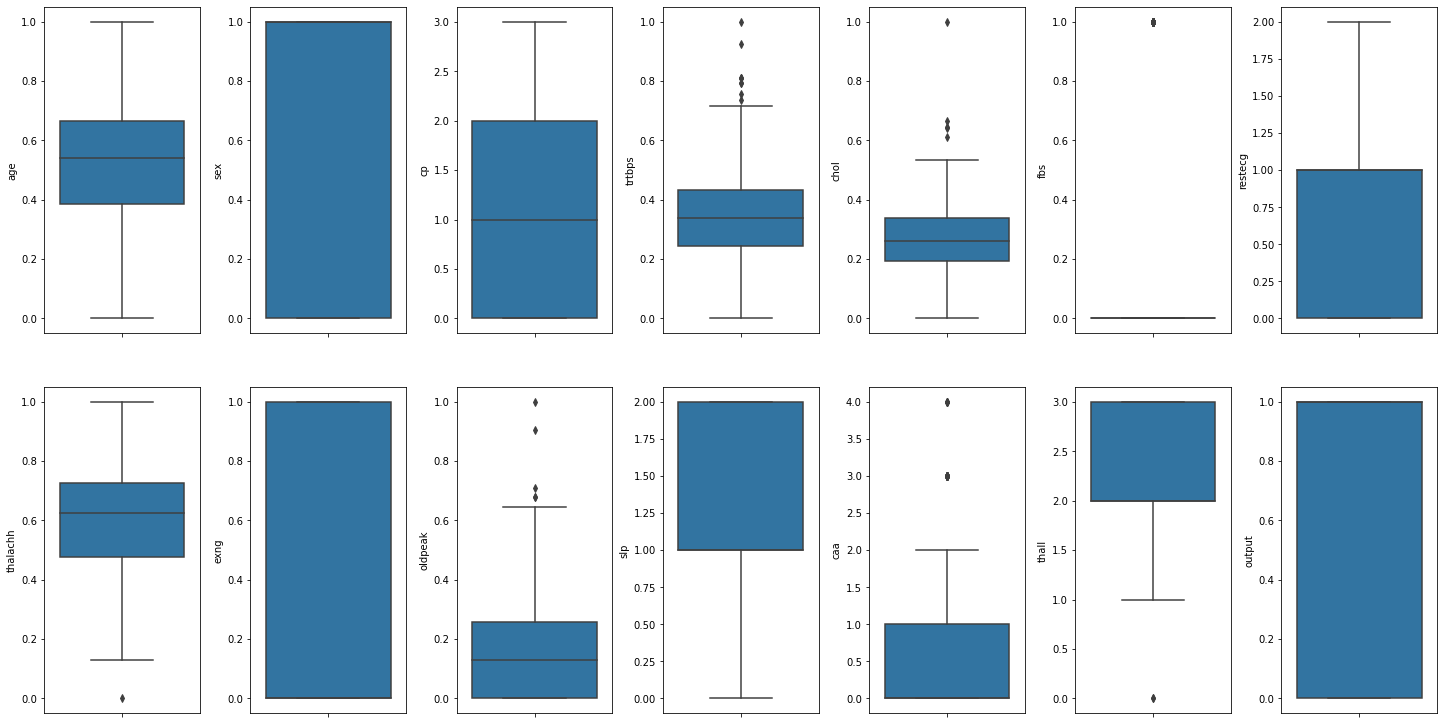

In [30]:
# Visualizing after min-max normalization 
fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

In [31]:
# Here we can see that after min-max normalization values now ranges from 0 to 1
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


In [33]:
# dropping 'output' from dataframe and saving dataframe in X which is now acting as input column
X = df.drop("output", axis=1)
X.shape

(303, 13)

In [34]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2


In [35]:
# y have only 'output' column 
y = df['output']
y.shape

(303,)

# Performing train_test_split

In [36]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=42)

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [38]:
# Creating model object
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

In [39]:
# Training Model
model_lg.fit(X_train, y_train)

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

In [40]:
# Making Prediction
pred_lg = model_lg.predict(X_test)

In [41]:
# Calculating Accuracy Score
lg = accuracy_score(y_test, pred_lg)
print(lg)

0.8360655737704918


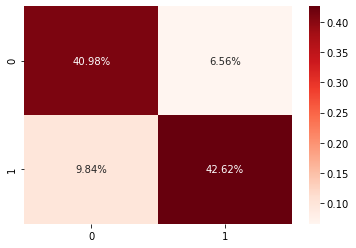

In [42]:
# confusion Maxtrix
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

Here, Type-1 Error is 6.56% which is also known as False Positive.
Type-2 Error is 9.84% which is also known as False Negative.
while other % value in the confusion matrix represents that they are correctly predicted in their specific categories.

# Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
# Creating model object
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)
# Training Model
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [44]:
# Making Prediction
pred_dt = model_dt.predict(X_test)
# Calculating Accuracy Score
dt = accuracy_score(y_test, pred_dt)
print(dt)

0.8524590163934426


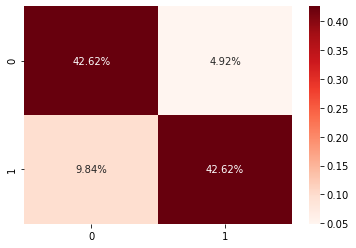

In [45]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

Here, Type-1 Error is 4.92% which is also known as False Positive.
Type-2 Error is 9.84% which is also known as False Negative.
while other % value in the confusion matrix represents that they are correctly predicted in their specific categories.

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)
# Training Model
model_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

In [47]:
# Making Prediction
pred_rf = model_rf.predict(X_test)
# Calculating Accuracy Score
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.9016393442622951


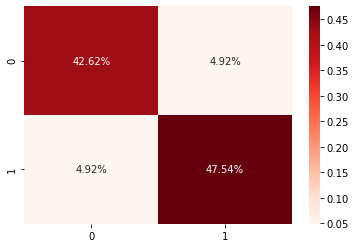

In [48]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')

Here, Type-1 Error is 4.92% which is also known as False Positive.
Type-2 Error is 4.92% which is also known as False Negative.
while other % value in the confusion matrix represents that they are correctly predicted in their specific categories.

,Model,Accuracy_score
2,Random Forest,0.901639
1,Decision Tree,0.852459
0,Logistic Regression,0.836066


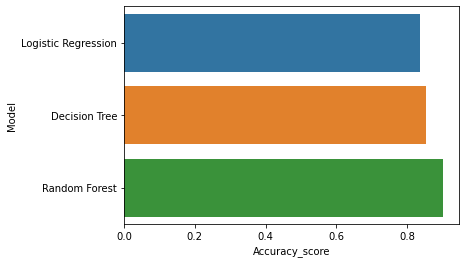

In [50]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy_score' :[lg, dt, rf]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

Conclusion :- After few hyperparameter tuning Random Forest achieved the highest accuracy here